# HW 6

This assignment covers Comparision of Decision Trees and Support Vector Machine. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Objective of this assignment is to help you master python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Decision Tree with KFold Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

* [Decision Tree with Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)

* [Support Vector Machine](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


# Data Processing

**Q1** Get training data from the dataframe
1. Load ../data/HW6_data.csv into a data frame
2. Check if there is any NaN in the dataset
3. Clean the dataset 
4. Assign values of ```target_class``` column to ```y```, note you have to use ```.values``` method
5. Drop ```target_class``` column from data frame,
6. Assign df values to x
7. Split dataset into train and test data use train_test_split with test_size = 0.25, stratify y and random_state = 1238

**A1** Replace ??? with code in the code cell below

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('HW6_data.csv')
df.head(10)
# check if there is NaN in the dataset
df.isnull()
#Drop NaNs if there is any
df.dropna(inplace = True)

# Count number of entries for different class_target
df['target_class'].size

9273

In [97]:
# Assign values of ```target_class``` column to y, note you have to use .values method
y = df.target_class.values
# Drop 'target_class' column from data frame,
df.drop(columns = ['target_class'], inplace = True)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape
y.shape

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 1238, stratify = y)

# Decision Tree

## Decision Tree with different depth

**Q2** Train DecisionTreeClassifier Model at different depths 
1. Create four [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) models with different parameters
2. Create four decision tree classifier models, use max_depth size = 1, 2, 5, 25 & max_leaf_nodes=5, 10, 15, 25 respectively
3. Use random_state=30 & criterion='entropy' for all models
4. Fit the model with the train data. You will have 4 different models for different depth sizes.
5. Predict the values with the test data 
6. Calculate the mean squared error of each model's prediction
7. Print precision recall curve for the model with the best MSE value

**A2** Replace ??? with code in the code cell below

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import display

#create decision tree classifier
clf_1 = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes = 5, random_state = 30, criterion = 'entropy') 
clf_2 = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes = 10, random_state = 30, criterion = 'entropy') 
clf_3 = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 15, random_state = 30, criterion = 'entropy') 
clf_4 = DecisionTreeClassifier(max_depth = 25, max_leaf_nodes = 25, random_state = 30, criterion = 'entropy') 

#fit classifier model
clf_1.fit(xtrain, ytrain)
clf_2.fit(xtrain, ytrain)
clf_3.fit(xtrain, ytrain)
clf_4.fit(xtrain, ytrain)

#predict
y_pred_clf1 = clf_1.predict(xtest)
y_pred_clf2 = clf_2.predict(xtest)
y_pred_clf3 = clf_3.predict(xtest)
y_pred_clf4 = clf_4.predict(xtest)

#calculate mean_squared_error
mse_clf1 = mean_squared_error(ytest, y_pred_clf1)
mse_clf2 = mean_squared_error(ytest, y_pred_clf2)
mse_clf3 = mean_squared_error(ytest, y_pred_clf3)
mse_clf4 = mean_squared_error(ytest, y_pred_clf4)

#printing mse values
display(mse_clf1)
display(mse_clf2)
display(mse_clf3)
display(mse_clf4)

0.0258732212160414

0.0258732212160414

0.02501078050884002

0.0258732212160414

### Precision-Recall Curve for Best Above

``Important Note:`` If ``from_estimator()`` function gives Attribute error then it means your sklearn is not updated.

* If you are using conda, you can upgrade with

conda upgrade -c conda-forge scikit-learn

* or, with pip,

python -m pip install scikit-learn --upgrade


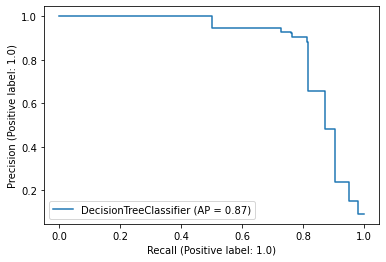

In [99]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

precision_recall_curve(ytest, y_pred_clf3)
PrecisionRecallDisplay.from_estimator(clf_3, xtest, ytest)
plt.show()

### Decision Tree with K-fold cross validation

**Q3** Use Kfold on the testing dataset, and evaluate the best model
1. Finally pick the best max_depth you got
2. Use this max_depth & max_leaf_node. Also, use cross_val_score and fit your model with k = 5 fold size
3. Calculate average scores in kfold

**A3** Replace ??? with code in the code cell below

In [100]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(clf_3, xtrain, ytrain, cv = KFold(n_splits = 5))
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.9798706  0.97843278 0.97699497 0.98634076 0.97482014]
Average cross-validation score: 0.98


###  Decision Tree with Bagging 

**Q4** Now we will use Bagging technique on the our previous best model, and evaluate it

```Part 1:```
1. Now, Create a Bagged Model passing  ```model = previous_best, n_estimators = 10 & random_state=1 to BaggingClassifier()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Precision-Recall Curve from the true & predicted test data

**A4** Replace ??? with code in the code cell below

In [101]:
from sklearn.ensemble import BaggingClassifier

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=10, random_state=1
bagged_clf = BaggingClassifier(n_estimators = 10, random_state = 1)
bagged_clf.fit(xtrain, ytrain)
pred = bagged_clf.predict(xtest)
mse = mean_squared_error(ytest, pred)

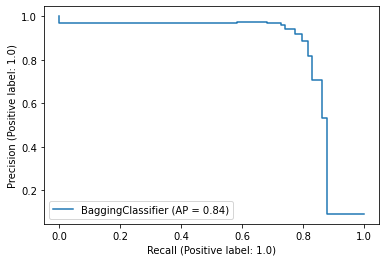

In [102]:
#pass necessary parameters to PrecisionRecallDisplay.from_estimator() 

PrecisionRecallDisplay.from_estimator(bagged_clf, xtest, ytest)
plt.show()

```Part 2: ```

1. Why BaggingClassifier is called an ensembled technique? why it works better most of the time than the single model classifiers?

### The BaggingClassifier is called an ensembled technique due to the nature of using multiple random data points in different models and each getting there own value which is then average or voted on. This a better technique as it creates more accurate predictions due to having multiple models evaluated. The concept is of ensembled technique is that of group thinking and how it's better to have multiple people looking at the data then just one expert. 

2. What is the disadvantage of incresing the number of estimators while using BaggingClassifier? Explain with an appropriate example.

### Increasing the number of estimators provides better accuracy but unfortantly takes much longer to compute the higher you go 

# Support Vector Machine(SVM)

**Q5** Create SVM Model on the training set, and evaluate

```Part:1```
1. Now, Create a SVM Model with default parameters
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot confusion matrix on the test data


**A5** Replace ??? with code in the code cell below

In [103]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

svc= SVC()

# fit classifier to training set
svc.fit(xtrain, ytrain)


# make predictions on test set
pred_svc = svc.predict(xtest)

#Calculate MSE
mse_svc = mean_squared_error(ytest, pred_svc)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(svc.score(xtest, ytest)))

Model accuracy score with default hyperparameters: 0.9685


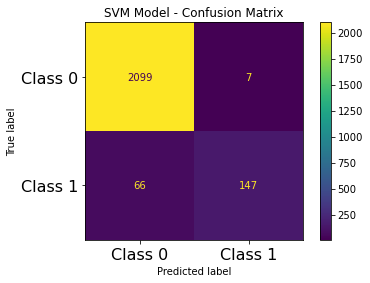

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(svc, xtest, ytest)

plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.show()

```Part2:```

1. From the above Confusion Matrix we can see that high number of Class 1 is predicted as Class 0 from the model. What is your reasoning behind this situtation? 

#### One of the possible reasons behind this issues is due the training data. If our training data accuracy is low it can give us a lot of erros when making the predictions. 

2. What can be done in order to resolve this issue?

#### If we look into the cleaning up the training data we can get better results. 

## SVM with high margin

**Q6** Create SVM Model on the training set, and evaluate

``Note:``
1. If we analyze our dataset using df.describe() function, we will see that there are many outliers in the dataset.
2. So, we need to increase our margin with ```HIGH C``` values so that the SVM model get better generalization

``Task:``

1. Now, Create a SVM Model with rbf kernel and C=100
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Confusion Matrix from the true & predicted test data


**A6** Replace ??? with code in the code cell below


In [105]:
# instantiate classifier with rbf kernel and C=100
svc= SVC(C = 100, kernel = 'rbf')


# fit classifier to training set
svc.fit(xtrain, ytrain)


# make predictions on test set
pred_Hsvc = svc.predict(xtest)

#calculate MSE
mse_Hsvc = mean_squared_error(ytest, pred_Hsvc)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(svc.score(xtest,ytest)))

Model accuracy score with rbf kernel and C=100.0 : 0.9733


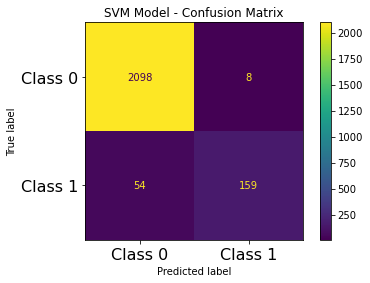

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

cm = ConfusionMatrixDisplay.from_estimator(svc, xtest, ytest)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.show()

## SVM with linear kernel

**Q7** Create SVM Model on the training set, and evaluate

``Task:``

1. Now, Create a SVM Model with linear kernel and C=1.0
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Confusion Matrix from the true & predicted test data


**A7** Replace ??? with code in the code cell below


In [107]:
# instantiate classifier with linear kernel and C=1.0
linear_svc= SVC(C = 1.0, kernel = 'linear')


# fit classifier to training set
linear_svc.fit(xtrain, ytrain)


# make predictions on test set
pred_linear_svc = linear_svc.predict(xtest)

#calculate MSE

mse_linear_svc = mean_squared_error(ytest, pred_linear_svc)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(linear_svc.score(xtest,ytest)))

Model accuracy score with linear kernel and C=1.0 : 0.9741


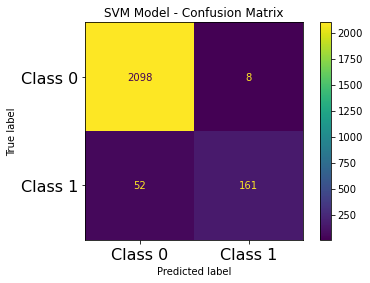

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

cm = ConfusionMatrixDisplay.from_estimator(linear_svc, xtest, ytest)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.show()

**Q8** Create a Grid Search for finetuning the value of ```C``` in SVM Model on the ```training set```,

``Task:``

1. Now, Create a SVM Model with linear kernel and evaluate the model for different values of C. ```Use 'C': [0.01, 0.1, 5, 10, 100]```
2. Use the sklearn GridSearchCV method for finetuning the ```linear SVM```.
3. Use ```3``` as the number of Cross Validation
4. Use ```accuracy``` as the scoring technique
5. Use ```clf.cv_results_ & clf.best_params_``` for getting the results from the Cross Validation run.
5. Now, Plot the Confusion Matrix for test data, using the ```best value of C``` we found from our finetune.  


**A8** Replace ??? with code in the code cell below


In [110]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel = 'linear'), tuned_parameters, cv = 3, scoring = 'accuracy', return_train_score = True)
clf.fit(xtrain, ytrain)
clf.cv_results_
clf.best_params_

{'C': 5}

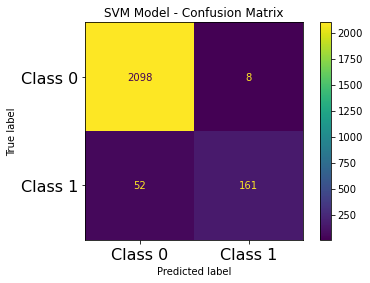

In [111]:
best_model= SVC(C = 5 ,kernel = 'linear')
best_model.fit(xtrain, ytrain)
cm = ConfusionMatrixDisplay.from_estimator(best_model ,xtest, ytest)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0","Class 1"], fontsize=16)
plt.show()

### We can see that after using the Best Value of ```C```, we have less amount of false positive in our test data prediction.